<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 2 // Statistical Treatment for Datasets</font></h1>

Title: Hacktiv8 PTP Introduction to Data Science Projects 2: Statistical Treatment for Datasets Starter Notebook\
Last Updated: September 20, 2020\
Author: Raka Ardhi

## NYC Property Sales Introduction

The aim of this projects is to introduce you to practical statistic with Python as concrete and as consistent as possible. Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

* `BOROUGH`: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* `BLOCK`; `LOT`: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* `BUILDING CLASS AT PRESENT` and `BUILDING CLASS AT TIME OF SALE`: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

* Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. Examples of questions can be:

* Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
* Is there a difference in unit sold based on building category?
* What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?

Please make sure that you have completed the lesson for this course, namely Python and Practical Statistics which is part of this Program.

**Note:** You can take a look at Project Rubric below:

| Code Review |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Mean | Student implement mean to specifics column/data using pandas, numpy, or scipy|
| Median | Student implement median to specifics column/data using pandas, numpy, or scipy|
| Modus | Student implement modus to specifics column/data using pandas, numpy, or scipy|
| Central Tendencies | Implementing Central Tendencies through dataset |
| Box Plot | Implementing Box Plot to visualize spesific data |
| Z-Score | Implementing Z-score concept to specific data |
| Probability Distribution | Student analyzing distribution of data and gain insight from the distribution |
| Intervals | Implementing Confidence or Prediction Intervals |
| Hypotesis Testing | Made 1 Hypotesis and get conclusion from data |
| Preprocessing | Student preprocess dataset before applying the statistical treatment. |
| Does the code run without errors? | The code runs without errors. All code is functional and formatted properly. |

| Readability |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Well Documented | All cell in notebook are well documented with markdown above each cell explaining the code|

| Analysis |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
|Overall Analysis| Gain an insight/conclusion of overall plots that answer the hypotesis |

**Focus on "Graded-Function" sections.**

------------

## Data Preparation

Load the library you need.

Get your NYC property data from [here](https://www.kaggle.com/new-york-city/nyc-property-sales) and load the dataframe to your notebook.

In [70]:
# Get your import statement here
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import math
import statistics
import scipy.stats
import seaborn as sns

In [5]:
# Load your dataset here
df = pd.read_csv('nyc-rolling-sales.csv')
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.

In [6]:
# Write your syntax here
df.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


We can also veiw the bottom 5 rows of the dataset using the `tail()` function.

In [8]:
# Write your syntax here
df.tail(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

To view the dimensions of the dataframe, we use the `.shape` parameter. Expected result: (84548, 22)

In [9]:
# Write your syntax here
df.shape

(84548, 22)

According to this official page, Ease-ment is "is a right, such as a right of way, which allows an entity to make limited use of another’s real property. For example: MTA railroad tracks that run across a portion of another property". Also, the Unnamed column is not mentioned and was likely used for iterating through records. So, those two columns are removed for now.

In [10]:
# Drop 'Unnamed: 0' and 'EASE-MENT' features using .drop function
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('EASE-MENT', axis=1)


Let's view Dtype of each features in dataframe using `.info()` function.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GROSS SQUARE FEET                 84548 non-null object
YEAR BUILT                        84548 non-null int64
TAX

It looks like empty records are not being treated as NA. We convert columns to their appropriate data types to obtain NAs.

In [12]:
#First, let's check which columns should be categorical
print('Column name')
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [13]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric. 
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH 

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    df[col] = pd.to_numeric(df[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    df[col] = df[col].astype('category')

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

Our dataset is ready for checking missing values.

In [14]:
missing = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


Around 30% of GROSS SF and LAND SF are missing. Furthermore, around 17% of SALE PRICE is also missing.

We can fill in the missing value from one column to another, which will help us reduce missing values. Expected values:

(6, 20)

(1366, 20)

In [15]:
print(df[(df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull())].shape)
print(df[(df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


There are 1372 rows that can be filled in with their approximate values.

In [16]:
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].mask((df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull()), df['GROSS SQUARE FEET'])
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].mask((df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull()), df['LAND SQUARE FEET'])

In [16]:
#  Check for duplicates before

print(sum(df.duplicated()))

df[df.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

# df.duplicated() automatically excludes duplicates, to keep duplicates in df we use keep=False

# in df.duplicated(df.columns) we can specify column names to look for duplicates only in those mentioned columns.

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
50126,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12
50127,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12


The dataframe has 765 duplicated rows (exluding the original rows).

In [17]:
df.drop_duplicates(inplace=True)

print(sum(df.duplicated()))

0


## Exploratory data analysis

Now, let's get a simple descriptive statistics with `.describe()` function for `COMMERCIAL UNITS` features.

In [18]:
df[df['COMMERCIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,78777.000000,78777.000000,78777.000000,78777.000000,78777.000000,78777.0,78777.000000,5.278000e+04,5.278000e+04,78777.000000,6.562900e+04
mean,3.004329,4273.781015,395.422420,10722.737068,1.691737,0.0,1.724133,3.140140e+03,2.714612e+03,1781.065451,9.952969e+05
std,1.298594,3589.241940,671.604654,1318.493961,9.838994,0.0,9.835016,2.929999e+04,2.791294e+04,551.024570,3.329268e+06
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1330.000000,23.000000,10304.000000,0.000000,0.0,1.000000,1.600000e+03,9.750000e+02,1920.000000,2.400000e+05
50%,3.000000,3340.000000,52.000000,11209.000000,1.000000,0.0,1.000000,2.295000e+03,1.600000e+03,1940.000000,5.294900e+05
75%,4.000000,6361.000000,1003.000000,11357.000000,2.000000,0.0,2.000000,3.300000e+03,2.388000e+03,1967.000000,9.219560e+05
max,5.000000,16322.000000,9106.000000,11694.000000,889.000000,0.0,889.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08


Let us try to understand the columns. Above table shows descriptive statistics for the numeric columns.

- There are zipcodes with 0 value
- Can block/lot numbers go up to 16322?
- Most of the properties have 2 unit and maximum of 1844 units? The latter might mean some company purchased a building. This should be treated as an outlier.
- Other columns also have outliers which needs further investigation.
- Year column has a year with 0
- Most sales prices less than 10000 can be treated as gift or transfer fees.

Now, let's get a simple descriptive statistics with `.describe()` function for `RESIDENTIAL UNITS` features.

Function below are graded function. (1 Points)

In [19]:
# Write your function below
df[df['RESIDENTIAL UNITS']!=0].describe()
# Graded-Funtion Begin (~1 Lines)
df[df['RESIDENTIAL UNITS']!=0][['BLOCK','LOT','RESIDENTIAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT','SALE PRICE']].describe()
# Graded-Funtion End

,BLOCK,LOT,RESIDENTIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,59237.000000,59237.000000,59237.000000,4.823100e+04,4.823100e+04,59237.000000,4.875200e+04
mean,4610.712342,414.339788,2.828705,3.156000e+03,3.287738e+03,1837.171987,1.130316e+06
std,3686.816317,687.593893,19.645674,2.814200e+04,2.982401e+04,456.570222,4.535920e+06
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1490.000000,26.000000,1.000000,1.850000e+03,1.248000e+03,1920.000000,2.900000e+05
50%,3937.000000,56.000000,1.000000,2.422000e+03,1.800000e+03,1935.000000,5.800000e+05
75%,6713.000000,1009.000000,2.000000,3.500000e+03,2.600000e+03,1979.000000,9.800000e+05
max,16322.000000,9106.000000,1844.000000,4.228300e+06,3.750565e+06,2017.000000,6.200000e+08


Write your findings below: 
1. Ada zipcode dengan angka 0
2. Ada Kolom Tahun dengan angka 0, apakah artinya ada yg belum dibangun?
3. Apakah jumlah block bisa lebih dari 16317?
4. Nilai minimum 1; 25% =1; 50 =1, apakah mungkin?
5. Ada Sale price 0 apakah artinya belum terjual?

Use `.value_counts` function to count total value of `BOROUGH` features. Expected value:

4    26548\
3    23843\
1    18102\
5     8296\
2     6994\
Name: BOROUGH, dtype: int64

In [26]:
# Write your syntax below
df['BOROUGH'].value_counts()


4    26548
3    23843
1    18102
5     8296
2     6994
Name: BOROUGH, dtype: int64

From here, we can calculate the mean for each Borough. Use `.mean()` function to calculate mean.

Function below are graded function. (1 Points)

In [91]:
# Write your function below
#df1 = df.[df['BOROUGH']== 1].mean()
#print(df1)
#df2 = df[df['BOROUGH']==2].mean()
#print(df2)
#df3 = df[df['BOROUGH']==3].mean()
#print(df3)
#df4 = df[df['BOROUGH']==4].mean()
#print(df4)
#df5 = df[df['BOROUGH']==5].mean()
#print(df5)
# Graded-Funtion Begin (~1 Lines)
for i in range(1,len(df['BOROUGH'].value_counts())+1):
    print(df.loc[df['BOROUGH']==i].mean())
# Graded-Funtion End
mea = df.groupby('BOROUGH',axis=0).mean()
mea

BOROUGH                      1.000000e+00
BLOCK                        1.107658e+03
LOT                          7.491904e+02
ZIP CODE                     9.912566e+03
RESIDENTIAL UNITS            2.276931e+00
COMMERCIAL UNITS             2.805215e-01
TOTAL UNITS                  2.597227e+00
LAND SQUARE FEET             5.646946e+03
GROSS SQUARE FEET            3.262300e+04
YEAR BUILT                   1.706537e+03
TAX CLASS AT TIME OF SALE    2.120539e+00
SALE PRICE                   3.344642e+06
dtype: float64
BOROUGH                           2.000000
BLOCK                          4202.934372
LOT                             298.625679
ZIP CODE                      10360.980841
RESIDENTIAL UNITS                 3.343580
COMMERCIAL UNITS                  0.160280
TOTAL UNITS                       3.510152
LAND SQUARE FEET               3909.012725
GROSS SQUARE FEET              4489.147412
YEAR BUILT                     1750.578067
TAX CLASS AT TIME OF SALE         1.525736
SALE PRI

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BOROUGH,,,,,,,,,,
1,1107.657938,749.190421,9912.565960,2.276931,0.280521,2.597227,5646.945628,32622.997758,1706.536902,3.344642e+06
2,4202.934372,298.625679,10360.980841,3.343580,0.160280,3.510152,3909.012725,4489.147412,1750.578067,5.946771e+05
3,4317.583484,339.525228,11072.688210,2.011618,0.145451,2.194229,2016.057333,2481.756365,1767.130185,8.410834e+05
4,6630.747589,230.493672,11300.423572,1.687283,0.190410,1.908920,4265.245190,3345.841693,1852.259982,7.388827e+05
5,3261.786162,198.775554,10047.136090,1.230111,0.080400,1.313163,8339.843259,4709.373037,1869.968177,5.436113e+05


From here, we can calculate the median for each Borough. Use `.median()` function to calculate median.

Function below are graded function. (1 Points)

In [90]:
# Write your function below
#df1med = df.loc[df['BOROUGH']== 1].median()
#print(df1med)
#df2med = df[df['BOROUGH']==2].median()
#print(df2med)
#df3med = df[df['BOROUGH']==3].median()
#print(df3med)
#df4med = df[df['BOROUGH']==4].median()
#print(df4med)
#df5med = df[df['BOROUGH']==5].median()
print(df5med)
# Graded-Funtion Begin (~1 Lines)
for i in range(1,len(df['BOROUGH'].value_counts())+1):
    print(df.loc[df['BOROUGH']==i].median())
# Graded-Funtion End
med = df.groupby('BOROUGH',axis=0).median()
med

BOROUGH                           5.0
BLOCK                          3024.0
LOT                              56.0
ZIP CODE                      10308.0
RESIDENTIAL UNITS                 1.0
COMMERCIAL UNITS                  0.0
TOTAL UNITS                       1.0
LAND SQUARE FEET               3700.0
GROSS SQUARE FEET              1632.0
YEAR BUILT                     1973.0
TAX CLASS AT TIME OF SALE         1.0
SALE PRICE                   465000.0
dtype: float64
BOROUGH                            1.0
BLOCK                           1170.0
LOT                             1004.0
ZIP CODE                       10022.0
RESIDENTIAL UNITS                  0.0
COMMERCIAL UNITS                   0.0
TOTAL UNITS                        1.0
LAND SQUARE FEET                2498.0
GROSS SQUARE FEET               7520.0
YEAR BUILT                      1937.0
TAX CLASS AT TIME OF SALE          2.0
SALE PRICE                   1155000.0
dtype: float64
BOROUGH                           2.0
BLOCK   

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BOROUGH,,,,,,,,,,
1,1170.0,1004.0,10022.0,0.0,0.0,1.0,2498.0,7520.0,1937.0,1155000.0
2,4177.5,47.0,10465.0,1.0,0.0,1.0,2375.0,1764.0,1932.0,274897.0
3,4558.0,50.0,11219.0,1.0,0.0,1.0,1800.0,1520.0,1930.0,425605.0
4,5900.0,40.0,11375.0,1.0,0.0,1.0,2768.0,1728.0,1945.0,495000.0
5,3024.0,56.0,10308.0,1.0,0.0,1.0,3700.0,1632.0,1973.0,465000.0


From here, we can calculate the mode for each Borough.

Function below are graded function. (1 Points)

In [89]:
# Write your function below
#df1mod = df[df['BOROUGH']== 1].mode()
#print (df1mod)
#df2mod = df[df['BOROUGH']== 2].mode()
#print (df2mod)
#df3mod = df[df['BOROUGH']== 3].mode()
#print (df3mod)
#df4mod = df[df['BOROUGH']== 4].mode()
#print (df4mod)
#df5mod = df[df['BOROUGH']== 5].mode()
#print (df5mod)
# Graded-Funtion Begin (~1 Lines)
for i in range(1,len(df['BOROUGH'].value_counts())+1):
    print(df.loc[df['BOROUGH']==i].mode())
# Graded-Funtion End
mod = df.groupby('BOROUGH',axis=0).mode()
mod

   BOROUGH             NEIGHBORHOOD  \
0        1  UPPER EAST SIDE (59-79)   

                       BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  13 CONDOS - ELEVATOR APARTMENTS                                2     16   

   LOT BUILDING CLASS AT PRESENT                 ADDRESS APARTMENT NUMBER  \
0    1                        R4  169 WEST 95TH   STREET                    

   ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
0     10011                  0                 0            1   

   LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT TAX CLASS AT TIME OF SALE  \
0            2523.0           112850.0           0                         2   

  BUILDING CLASS AT TIME OF SALE  SALE PRICE  SALE DATE  
0                             R4        10.0 2017-08-07  
   BOROUGH NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
0        2    RIVERDALE  02 TWO FAMILY DWELLINGS                       

  TAX CLASS AT PRESENT  BLOCK  LOT BUILDING CLASS AT PRE

AttributeError: Cannot access callable attribute 'mode' of 'DataFrameGroupBy' objects, try using the 'apply' method

From here, we can calculate the Range for each Borough.

Function below are graded function. (1 Points)

In [86]:
# Write your function below
#for i in range(1,len(df['BOROUGH'].value_counts())+1):
#    print(df.loc[df['BOROUGH']==i].range())
## Graded-Funtion Begin (~1 Lines)
makss = df.groupby('BOROUGH',axis=0).max()
minn = df.groupby('BOROUGH',axis=0).min()

for x in makss.index:
    print('City Range Info:',x)
    print('block',makss.iloc[x-1]['BLOCK'] - minn.iloc[x-1]['BLOCK'])
    print('lot',makss.iloc[x-1]['LOT'] - minn.iloc[x-1]['LOT'])
    print('res',makss.iloc[x-1]['RESIDENTIAL UNITS'] - minn.iloc[x-1]['RESIDENTIAL UNITS'])
    print('comm',makss.iloc[x-1]['COMMERCIAL UNITS'] - minn.iloc[x-1]['COMMERCIAL UNITS'])
    print('tot',makss.iloc[x-1]['TOTAL UNITS'] - minn.iloc[x-1]['TOTAL UNITS'])
    print('land',makss.iloc[x-1]['LAND SQUARE FEET'] - minn.iloc[x-1]['LAND SQUARE FEET'])
    print('gross',makss.iloc[x-1]['GROSS SQUARE FEET'] - minn.iloc[x-1]['GROSS SQUARE FEET'])
    print('year',makss.iloc[x-1]['YEAR BUILT'] - minn.iloc[x-1]['YEAR BUILT'])
    print('sale',makss.iloc[x-1]['SALE PRICE'] - minn.iloc[x-1]['SALE PRICE'])

# Graded-Funtion End

City Range Info: 1
block 2243
lot 9105
res 1641
comm 422
tot 1653
land 363912.0
gross 2155404.0
year 2017
sale 2209999999.0
City Range Info: 2
block 3692
lot 5360
res 948
comm 22
tot 955
land 679000.0
gross 1303935.0
year 2017
sale 110000000.0
City Range Info: 3
block 8954
lot 9008
res 889
comm 184
tot 889
land 970000.0
gross 1330743.0
year 2017
sale 345000000.0
City Range Info: 4
block 16309
lot 8008
res 1844
comm 2261
tot 2261
land 4228293.0
gross 3750558.0
year 2017
sale 257499999.0
City Range Info: 5
block 8049
lot 5356
res 143
comm 126
tot 143
land 4252225.0
gross 4252225.0
year 2016
sale 121999999.0


From here, we can calculate the Variance for each Borough.

Function below are graded function. (1 Points)

In [80]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
var = df.groupby('BOROUGH',axis=0).var()
var
# Graded-Funtion End

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BOROUGH,,,,,,,,,,
1,2.886372e+05,776690.497576,1.165824e+06,496.366872,39.571488,542.115484,2.727154e+08,1.319930e+10,420464.577474,5.827628e+14
2,1.116755e+06,574149.535826,1.069825e+06,498.684024,0.771532,514.454709,3.375209e+08,8.683572e+08,340594.440137,7.803693e+12
3,7.335413e+06,285379.149550,1.636403e+06,72.958719,2.704118,75.818955,7.882877e+07,2.210455e+08,313687.756141,1.561761e+13
4,1.872519e+07,243622.537761,8.162344e+05,328.621156,201.281217,535.806222,2.092701e+09,1.738524e+09,180710.056112,1.041624e+13
5,5.377588e+06,182550.857153,2.621956e+06,5.327995,3.972920,9.165570,7.797466e+09,4.750796e+09,186468.092538,3.631100e+12


From here, we can calculate the SD for each Borough.

Function below are graded function. (1 Points)

In [81]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
std = df.groupby('BOROUGH',axis=0).std()
std
# Graded-Funtion End

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BOROUGH,,,,,,,,,,
1,537.249675,881.300458,1079.733231,22.279292,6.290587,23.283374,16514.096636,114888.218288,648.432400,2.414048e+07
2,1056.766385,757.726557,1034.323430,22.331234,0.878369,22.681594,18371.742462,29467.900592,583.604695,2.793509e+06
3,2708.396811,534.208901,1279.219844,8.541588,1.644420,8.707408,8878.556905,14867.597573,560.078348,3.951912e+06
4,4327.260807,493.581339,903.456927,18.127911,14.187361,23.147488,45746.045898,41695.613170,425.100054,3.227420e+06
5,2318.962697,427.259707,1619.245590,2.308245,1.993219,3.027469,88303.260793,68926.020904,431.819514,1.905544e+06


Now we can analyze Probability Distibution below.

Function below are graded function. (1 Points)

/home/josh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Prob. of Dist.')

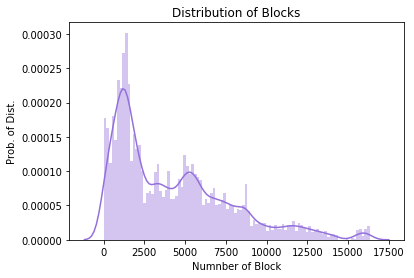

In [82]:
# Write your function below
import matplotlib.pyplot as plt
import seaborn as sns
# Graded-Funtion Begin
sns.distplot(df['BLOCK'],bins=100,kde=True,color='mediumpurple')
plt.title("Distribution of Blocks")
plt.xlabel("Numnber of Block")
plt.ylabel("Prob. of Dist.")


# Graded-Funtion End

Now we can analyze Confidence Intervals below.

Function below are graded function. (1 Points)

In [84]:
# Write your function below
ave = df.groupby('BOROUGH',axis=0).mean()
# Graded-Funtion Begin

se = std/np.sqrt(len(df['BOROUGH']))
z = 1.96
lcb = ave - z*se
ucb = ave + z*se
lcb,ucb



# Graded-Funtion End

(               BLOCK         LOT      ZIP CODE  RESIDENTIAL UNITS  \
 BOROUGH                                                             
 1        1104.020009  743.222788   9905.254660           2.126069   
 2        4195.778590  293.494814  10353.977029           3.192367   
 3        4299.243860  335.907888  11064.026108           1.953779   
 4        6601.445999  227.151438  11294.305909           1.564532   
 5        3246.083551  195.882410  10036.171539           1.214481   
 
          COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
 BOROUGH                                                                       
 1                0.237925     2.439566       5535.122164       31845.044306   
 2                0.154332     3.356566       3784.610409        4289.608631   
 3                0.134316     2.135268       1955.937122        2381.081996   
 4                0.094342     1.752179       3955.480666        3063.504246   
 5                0.066903  

Make your Hypothesis Testing below

Function below are graded function. (1 Points)

In [85]:
# Write your function below

# Graded-Funtion Begin
import statsmodels.api as sm
sm.stats.ztest(df['TOTAL UNITS'])




# Graded-Funtion End

(34.12048793051029, 3.6649104943627213e-255)

Write your final conclusion below.

Your conclusion below are graded. (1 Points)